## CDC Wonder Data
### This notebook shows the data from CDC Wonder Database for cross-validating the results obtained from the API call data results from US Census Bureau

* Dataset for the male population of Illinois by age groups and race/ethnicity from 2010 - 2020
* Downloaded from the Wonder Database from CDC (after removing irrelevant fields and rows)
* The dataset file is stored under this repository with the file name 'wonder_CDC_dataset.csv'

*Link to the raw dataset:*<br>
https://wonder.cdc.gov/controller/datarequest/D170;jsessionid=535B58DD97F6421AA99A8F6679A7

In [1]:
# Loading the dataset

import pandas as pd

## Read the dataset file downloaded from CDC Wonder Database
CDC_df = pd.read_csv('wonder_CDC_dataset.csv')
CDC_df = CDC_df.iloc[:-3,:]

## Cleaning and Transforming the format of the dataset
CDC_df['Yearly July 1st Estimates'] = CDC_df['Yearly July 1st Estimates'].astype('int32')
CDC_df['Population'] = CDC_df['Population'].astype('int32')
CDC_df['Notes'] = CDC_df['Notes'].fillna("Sub-group Total")
CDC_df['Race'] = CDC_df['Race'].fillna("All Race")
CDC_df['Ethnicity'] = CDC_df['Ethnicity'].fillna("All Ethnicity")

## Function for querying the dataset
def query_func(df: pd.DataFrame, 
               year='all', 
               race: str='all', 
               ethnicity: str='all',
               age_group: str='all'):
    
    ### Setting the display dataframe to show all rows
    pd.set_option('display.max_rows', None)
    
    ### Set up the query conditions text string
    query_string = str()
    
    if year != 'all':
        query_string += f'`Yearly July 1st Estimates` == {year}'
    
    if race != 'all':
        query_string += '& ' + f'`Race` == "{race}"'
    
    if ethnicity != 'all':
        query_string += '& ' + f'`Ethnicity` == "{ethnicity}"'
        
    if age_group != 'all':
        query_string += '& ' + f'`Ten-Year Age Groups` == "{age_group}"'
    
    
    ### Display the query results
    display(df.query(query_string))

    
    
## Display the final dataframe
display(CDC_df)

,Yearly July 1st Estimates,Ten-Year Age Groups,Ethnicity,Race,Notes,Population
0,2010,< 1 year,Hispanic or Latino,Black or African American,Sub-group Total,810
1,2010,< 1 year,Hispanic or Latino,White,Sub-group Total,18903
2,2010,< 1 year,Hispanic or Latino,All Race,Total,19713
3,2010,< 1 year,Not Hispanic or Latino,Black or African American,Sub-group Total,13152
4,2010,< 1 year,Not Hispanic or Latino,White,Sub-group Total,42305
...,...,...,...,...,...,...
853,2020,85+ years,Not Hispanic or Latino,Black or African American,Sub-group Total,8362
854,2020,85+ years,Not Hispanic or Latino,White,Sub-group Total,72980
855,2020,85+ years,Not Hispanic or Latino,All Race,Total,81342
856,2020,85+ years,All Ethnicity,All Race,Total,87295


## Male Population Statistics for Illinois and Chicago Metro Area from US Census Bureau

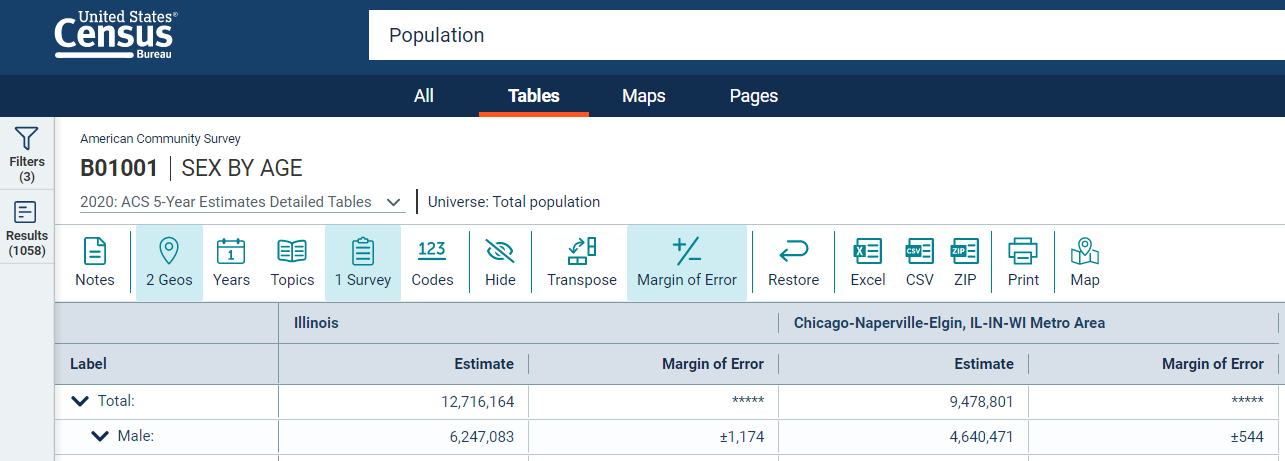


*Source: US Census Bureau*<br>
*https://data.census.gov/cedsci/table?q=Population&g=0400000US17_310XX00US16980&d=ACS%205-Year%20Estimates%20Detailed%20Tables&tid=ACSDT5Y2020.B01001*

In [5]:
## Calculate the Ratio of Male Population in Chicago Metro Area over Illinois in 2020

pct_IL_Chi = round((4640471/6247083)*100, 1)

print('Ratio of Male Population in Chicago Metro Area over Illinois = 4,640,471/6,247,083 = ' + str(pct_IL_Chi) + '%')

Ratio of Male Population in Chicago Metro Area over Illinois = 4,640,471/6,247,083 = 74.3%


From the US Census Bureau data, the male population is 6,247,083 in the state of Illinois and 4,640,471 in the Chicago Metropolitan Area in 2020.<br><br>As such, we can infer that the population statistic in the CDC Wonder dataset multiplied by c. 74.3% (this ratio should roughly hold for other years as well) should be roughly in line with the population statistic in the ACS API data, and can serve as a reference point to verify the accuracy of the data.

## Example Demonstrations

Below shows an example of using the query function *query_func* defined above to query the dataset from CDC Wonder using criteria such as year, race, and age group:

### Example 1: Query by Year and Race

In [3]:
## Query by: year = 2018, race = Black or African American (Non Hispanic)
query_func(df = CDC_df, year = 2018, race = 'Black or African American', ethnicity = 'Not Hispanic or Latino')

,Yearly July 1st Estimates,Ten-Year Age Groups,Ethnicity,Race,Notes,Population
627,2018,< 1 year,Not Hispanic or Latino,Black or African American,Sub-group Total,12576
634,2018,1-4 years,Not Hispanic or Latino,Black or African American,Sub-group Total,49379
641,2018,5-14 years,Not Hispanic or Latino,Black or African American,Sub-group Total,121900
648,2018,15-24 years,Not Hispanic or Latino,Black or African American,Sub-group Total,134469
655,2018,25-34 years,Not Hispanic or Latino,Black or African American,Sub-group Total,132773
662,2018,35-44 years,Not Hispanic or Latino,Black or African American,Sub-group Total,101730
669,2018,45-54 years,Not Hispanic or Latino,Black or African American,Sub-group Total,102207
676,2018,55-64 years,Not Hispanic or Latino,Black or African American,Sub-group Total,97773
683,2018,65-74 years,Not Hispanic or Latino,Black or African American,Sub-group Total,56178
690,2018,75-84 years,Not Hispanic or Latino,Black or African American,Sub-group Total,25217


### Example 2: Query by Year, Ethnicity, and Age Group

In [4]:
## Query by: year = 2016, ethnicity = Hispanic/Latino, Age Group = 45-54 years
query_func(df = CDC_df, year = 2016, ethnicity = 'Hispanic or Latino', age_group = '45-54 years')

,Yearly July 1st Estimates,Ten-Year Age Groups,Ethnicity,Race,Notes,Population
510,2016,45-54 years,Hispanic or Latino,Black or African American,Sub-group Total,2987
511,2016,45-54 years,Hispanic or Latino,White,Sub-group Total,118573
512,2016,45-54 years,Hispanic or Latino,All Race,Total,121560
